<img src="https://bit.ly/2VnXWr2" alt="Ironhack Logo" width="100"/>

# Tableau Project

In this project we assume the position of employees of a data analysis team of a energy company in Portugal.
Our goal is to understand if and how climate events impact energy production and work productivity. 

The data used is from PORDATA, a database that aggregates data from several portuguese and european official sources. 

Below you can see all data preparation steps with all the explainations of data manipulation and filtering.

In [1]:
import numpy as np
import pandas as pd
from functools import reduce

import matplotlib.pyplot as plt

In [2]:
def clean_pordata_temp(df, drop_zeros):
    df = df.rename(columns={'Unnamed: 0':'Year'})
    if drop_zeros == 'y':
        df = df.loc[(df!=0).all(axis=1)]
    df = df.dropna(axis='columns', thresh=2)
    df = df.dropna()
    df = df.reset_index(drop=True)
    return df

In [3]:
def merge_dataframe (objs, key):
    """Merge DataFrames, given the dfs (objs) and the key (where df will merge)"""
    return reduce(lambda left,right: pd.merge(left,right,on=key), objs)

# Environmental Data
Importing and analysing data about weather and environment

## Importing and Cleaning Data

In [4]:
# Average of the max temperature by year
max_temp = pd.read_excel('original-datasets/temp-max-media.xlsx', skiprows=7)

# Clean data
max_temp_cleaned = clean_pordata_temp(max_temp, drop_zeros='y')
max_temp_cleaned.head()

,Year,Viana do Castelo,Bragança,Porto,Castelo Branco,Lisboa,Beja,Faro,Funchal,Angra do Heroísmo
0,1970,19.8,17.8,19,21,21,22.3,22.0,21.4,18.9
1,1971,19.3,16.2,18.7,19.8,20.3,21.2,21.2,21.5,19.0
2,1972,18.4,16.2,17.7,19.4,19.5,20.7,21.1,21.1,19.1
3,1973,19.8,17.6,19,21.2,20.7,22.3,21.8,21.5,19.0
4,1974,19.1,17,18.3,21.2,20.6,22.4,22.0,21.3,18.9


In [5]:
# Max temperature of the hottest month by year
# Import data
max_temp_month = pd.read_excel('original-datasets/temp-max-mes-quente.xlsx', skiprows=7)

# Clean data
max_temp_month_cleaned = clean_pordata_temp(max_temp_month, drop_zeros='y')
max_temp_month_cleaned.head()

,Year,Viana do Castelo,Bragança,Porto,Castelo Branco,Lisboa,Beja,Faro,Funchal,Angra do Heroísmo
0,1970,26.7,29.1,25.2,31.9,27.8,32.6,29.5,25.3,24.9
1,1971,25.8,24.8,24.4,29.3,26.6,31.1,27.6,26.1,23.4
2,1972,25.3,28,23.7,30.1,26.5,30.9,28.0,25.2,24.7
3,1973,26.7,30.7,23.7,34.1,28.7,34.4,28.9,25.4,25.0
4,1974,28.1,28.4,25.8,33.3,29.7,35.9,30.7,24.4,22.9


In [6]:
# days without precipitation
seca_init = pd.read_excel('original-datasets/dias-sem-precipitacao.xlsx', skiprows=7)

# Clean data
seca_init_cleaned = clean_pordata_temp(seca_init, drop_zeros='y')
seca_init_cleaned.head()

,Year,Viana do Castelo,Bragança,Porto,Castelo Branco,Lisboa,Beja,Faro,Funchal,Angra do Heroísmo
0,1970,225,257,237,298,256,268.0,288.0,297.0,171.0
1,1971,202,218,201,276,246,248.0,269.0,308.0,187.0
2,1972,187,220,188,353,208,238.0,249.0,288.0,173.0
3,1973,248,263,242,295,261,280.0,304.0,310.0,191.0
4,1974,226,249,223,282,257,275.0,294.0,318.0,175.0


In [7]:
# Importing the Data
# Duration of heatwaves in Portugal by District
days_heat_wave = pd.read_excel('original-datasets/dias-onda-calor.xlsx', skiprows=7)

# Clean the data
days_heat_wave_cleaned = clean_pordata_temp(days_heat_wave, drop_zeros='não')
days_heat_wave_cleaned.head()

,Year,Viana do Castelo,Bragança,Porto,Castelo Branco,Lisboa,Beja,Faro,Funchal,Angra do Heroísmo
0,1960,0,6,0,12,0,0.0,0.0,0.0,0.0
1,1961,0,15,0,8,16,9.0,0.0,6.0,0.0
2,1962,0,6,0,12,0,6.0,0.0,0.0,0.0
3,1963,0,9,0,8,0,11.0,0.0,0.0,0.0
4,1964,0,24,0,25,0,21.0,0.0,0.0,0.0


## Manipulation da massaging data
We decided to maintain the information of the temperatures by city, to give the possibility to the user of chosing the city in the dashboard, seing the differences between each city in terms of drought, maximum temperatures and heatwaves. So the dataframes will be melted. 

In [8]:
max_temp_melted = pd.melt(max_temp_cleaned, id_vars='Year', value_vars=['Viana do Castelo', 'Bragança', 'Porto', 'Castelo Branco', 'Lisboa', 'Beja', 'Faro'], var_name='City',value_name='max_avg_temp')
max_temp_melted.head()

,Year,City,max_avg_temp
0,1970,Viana do Castelo,19.8
1,1971,Viana do Castelo,19.3
2,1972,Viana do Castelo,18.4
3,1973,Viana do Castelo,19.8
4,1974,Viana do Castelo,19.1


In [9]:
max_temp_month_melted = pd.melt(max_temp_month_cleaned, id_vars='Year', value_vars=['Viana do Castelo', 'Bragança', 'Porto', 'Castelo Branco', 'Lisboa', 'Beja', 'Faro'], var_name='City',value_name='max_avg_temp_month')
max_temp_month_melted.head()

,Year,City,max_avg_temp_month
0,1970,Viana do Castelo,26.7
1,1971,Viana do Castelo,25.8
2,1972,Viana do Castelo,25.3
3,1973,Viana do Castelo,26.7
4,1974,Viana do Castelo,28.1


In [10]:
drought_melted = pd.melt(seca_init_cleaned, id_vars='Year', 
                         value_vars=['Viana do Castelo', 'Bragança', 'Porto', 'Castelo Branco', 'Lisboa', 'Beja', 'Faro'], 
                         var_name='City',value_name='Drought')
drought_melted.head()

,Year,City,Drought
0,1970,Viana do Castelo,225
1,1971,Viana do Castelo,202
2,1972,Viana do Castelo,187
3,1973,Viana do Castelo,248
4,1974,Viana do Castelo,226


#### Heat Waves Days 
We want to know if heat waves have a direct impact in productivity and in energy consumption in a year. 
For that reason we first calculated the mean and max for each year, given all the data from the districts. 

In [11]:
days_heat_wave_cleaned['MEAN Days Heat Wave'] = days_heat_wave_cleaned[['Viana do Castelo','Bragança','Porto','Castelo Branco','Lisboa','Beja']].mean(axis=1)
days_heat_wave_cleaned['MAX Days Heat Wave'] = days_heat_wave_cleaned[['Viana do Castelo','Bragança','Porto','Castelo Branco','Lisboa','Beja', 'Faro']].max(axis=1)

As the information present in the datset has many zeros, the mean may not be the best option for the representation. On the other side, the max value of each year may also show an inacurate representation of the environmental reality in Portugal for a given year. 

So, we decided to plot all the information to help us make a decision.

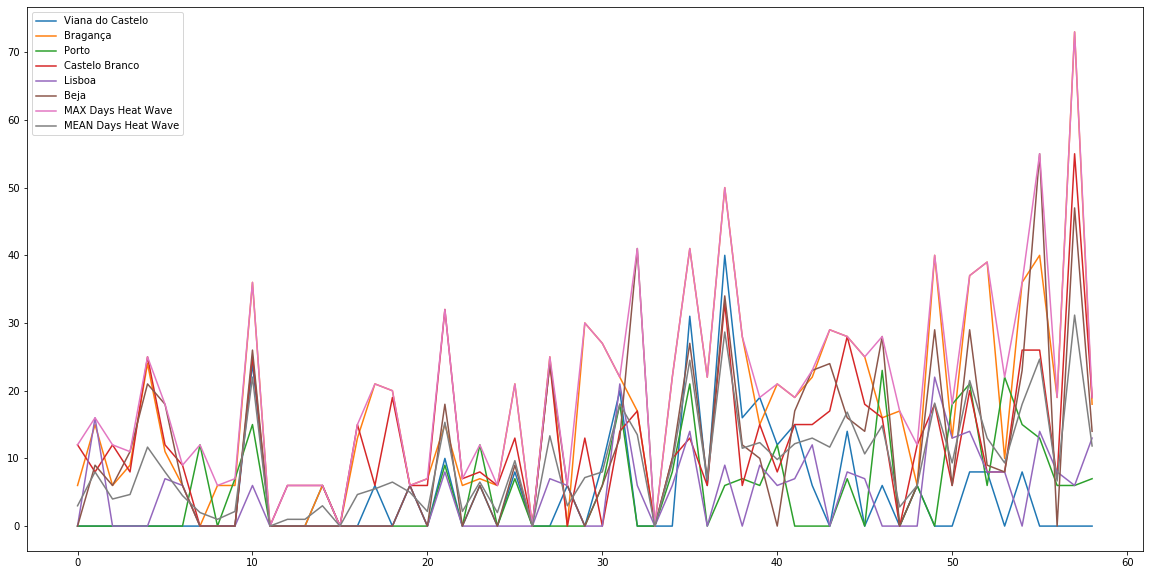

In [12]:
plt.figure(figsize=(20,10))
for i in ['Viana do Castelo','Bragança','Porto','Castelo Branco','Lisboa','Beja', 'MAX Days Heat Wave', 'MEAN Days Heat Wave']:
    plt.plot(i, data = days_heat_wave_cleaned)
    #plt.scatter(x = 'Year', y = i, data = days_heat_wave)
plt.legend(loc='best')  
plt.show()

After looking to the data we decided to keep all the information about the district capitals, melting all cities in the dataset. In this way, as mentioned above, all the information can be used by the user in the visualization dashboard. 

In [13]:
# melting the data. 

days_heat_wave_melted = pd.melt(days_heat_wave_cleaned, id_vars = 'Year', value_vars = ['Viana do Castelo','Bragança','Porto','Castelo Branco','Lisboa','Beja', 'Faro'], var_name = 'City', value_name = 'Days with Heat Waves')
days_heat_wave_melted.head()

,Year,City,Days with Heat Waves
0,1960,Viana do Castelo,0
1,1961,Viana do Castelo,0
2,1962,Viana do Castelo,0
3,1963,Viana do Castelo,0
4,1964,Viana do Castelo,0


## Labour Productivity

In [14]:
# Work productivity
produtividade = pd.read_excel('original-datasets/Produtividade-aparente-do-trabalho.xlsx',
                             skiprows=6)
produtividade_clean = produtividade.dropna(axis='columns', thresh=6)
produtividade_clean = produtividade_clean.dropna()
produtividade_clean = produtividade_clean[:22]
produtividade_clean.head()

,Anos,Produtividade aparente do trabalho
0,1995,18177
1,1996,18879.4
2,1997,19967.8
3,1998,20877.2
4,1999,21996.7


In [15]:
produtividade_final = produtividade_clean.rename(columns={'Anos':'Year'})
produtividade_final['Produtividade aparente do trabalho'] = produtividade_final['Produtividade aparente do trabalho'].astype(float)

## Eletrict energy prodution: Total and by source of production

How much energy is generated by wind, geotermic, hydric, and solar?
This information is relevant to cross with the environmental information. We intend to see if heatwaves or drought have an impact on different energy sources of energy production. 

In [16]:
# Importing the data
energy_production_init = pd.read_excel('original-datasets/Electric energy production.xlsx', skiprows=7)
energy_production_init.head()

,Unnamed: 0,Total,Eólica,Geotérmica,Hídrica,Térmica,Fotovoltaica,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,1994,31381,17,33,10702,20628,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1995,33264,16,42,8454,24751,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1996,34520,21,49,14857,19592,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1997,34207,38,51,13175,20942,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1998,38984,89,58,13054,25782,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
## Cleaning the data
# reset the index after droping some of the rows
energy_production_init.reset_index(inplace = True)

energy_production_init = energy_production_init.iloc[0:24, 1:8]
# Renaming the columns
energy_production_init.columns = ['Year', 'Total', 'Eolic', 'Geothermal', 'Hydric', 'Thermal','Photovoltaic']
energy_production_init.head()

,Year,Total,Eolic,Geothermal,Hydric,Thermal,Photovoltaic
0,1994,31381,17,33,10702,20628,1.0
1,1995,33264,16,42,8454,24751,1.0
2,1996,34520,21,49,14857,19592,1.0
3,1997,34207,38,51,13175,20942,1.0
4,1998,38984,89,58,13054,25782,1.0


As we can see, the DataFrame has information regarding the total energy produced as well as the source of energy. For this study we understand that it may be relevant to keep the different sources of energy, so we melted the DataFrame.

In [18]:
energy_production = pd.melt(energy_production_init, id_vars = 'Year', value_vars = ['Total', 'Eolic', 'Geothermal', 'Hydric', 'Thermal','Photovoltaic'], var_name = 'Production Source', value_name = 'Energy Production (GWh)')
energy_production.head()

,Year,Production Source,Energy Production (GWh)
0,1994,Total,31381
1,1995,Total,33264
2,1996,Total,34520
3,1997,Total,34207
4,1998,Total,38984


## Energy Consumption by Sector

In [19]:
energy_consumption = pd.read_excel(io = 'original-datasets/consumo-energia-setor.xlsx', header = 1, skiprows = 6, usecols = 11)

/usr/local/lib/python3.6/dist-packages/pandas/io/excel/_base.py:445: FutureWarning: Passing in an integer for `usecols` has been deprecated. Please pass in a list of int from 0 to `usecols` inclusive instead.
  usecols = _maybe_convert_usecols(usecols)


For this analysis we decided to keep only the total amount of energy consumption, and not by sector. 

In [20]:
energy_consumption = energy_consumption.iloc[:24, 0:2]
energy_consumption.columns = ['Year', 'Energy Consumption kWh']
energy_consumption.head()

,Year,Energy Consumption kWh
0,1994,27751311564
1,1995,29237207072
2,1996,30793680351
3,1997,32438177021
4,1998,34410979269


## Comparing Energy production and consumption

In [21]:
energy_consumption['Energy Consumption kWh'] = energy_consumption['Energy Consumption kWh']*1/1000000
energy_consumption = energy_consumption.rename(columns={'Energy Consumption kWh':'Energy Consumption (GWh)'})

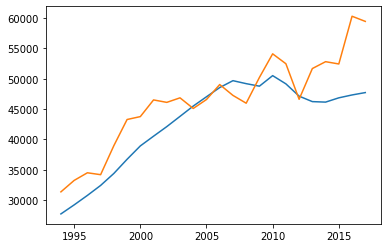

In [22]:
plt.plot(energy_consumption['Year'], energy_consumption['Energy Consumption (GWh)'])
plt.plot(energy_production_init['Year'], energy_production_init['Total'])

# Merge

To create an unique dataset we decided to merge all the dataframes. 

In [23]:
def merge_dataframe (objs, key):
    return reduce(lambda left,right: pd.merge(left,right,on=key), objs)

We star by merging and the data related to the environment and weater, since we are using two keys: City and Year.

In [24]:
melted_merged = merge_dataframe(objs=[drought_melted,max_temp_month_melted, max_temp_melted, days_heat_wave_melted], 
                                key=['Year','City'])
melted_merged.head()

,Year,City,Drought,max_avg_temp_month,max_avg_temp,Days with Heat Waves
0,1970,Viana do Castelo,225,26.7,19.8,24
1,1971,Viana do Castelo,202,25.8,19.3,0
2,1972,Viana do Castelo,187,25.3,18.4,0
3,1973,Viana do Castelo,248,26.7,19.8,0
4,1974,Viana do Castelo,226,28.1,19.1,6


Then we merge the weather related dataset with all other data. 

In [25]:
merged_data1 = merge_dataframe(objs=[melted_merged, energy_consumption, energy_production ,produtividade_final],
                               key='Year')
merged_data1.head()

,Year,City,Drought,max_avg_temp_month,max_avg_temp,Days with Heat Waves,Energy Consumption (GWh),Production Source,Energy Production (GWh),Produtividade aparente do trabalho
0,1995,Viana do Castelo,227,28.6,21,31,29237.2,Total,33264,18177.0
1,1995,Viana do Castelo,227,28.6,21,31,29237.2,Eolic,16,18177.0
2,1995,Viana do Castelo,227,28.6,21,31,29237.2,Geothermal,42,18177.0
3,1995,Viana do Castelo,227,28.6,21,31,29237.2,Hydric,8454,18177.0
4,1995,Viana do Castelo,227,28.6,21,31,29237.2,Thermal,24751,18177.0


## Final data manipulations

In [26]:
# Checking types of data
merged_data1.dtypes

Year                                   object
City                                   object
Drought                                object
max_avg_temp_month                     object
max_avg_temp                           object
Days with Heat Waves                   object
Energy Consumption (GWh)               object
Production Source                      object
Energy Production (GWh)                object
Produtividade aparente do trabalho    float64
dtype: object

In [27]:
# Changind all numeric values to float
merged_data1[
    ['Drought', 'max_avg_temp_month', 'max_avg_temp',
       'Days with Heat Waves', 'Energy Consumption (GWh)',
       'Energy Production (GWh)', 'Produtividade aparente do trabalho']] = merged_data1[
    ['Drought', 'max_avg_temp_month', 'max_avg_temp',
       'Days with Heat Waves', 'Energy Consumption (GWh)',
       'Energy Production (GWh)', 'Produtividade aparente do trabalho']].astype(float)

In [28]:
# Check if there are any correlations 

merged_data1.corr(method='pearson')

,Drought,max_avg_temp_month,max_avg_temp,Days with Heat Waves,Energy Consumption (GWh),Energy Production (GWh),Produtividade aparente do trabalho
Drought,1.000000,0.502270,0.641368,-0.063469,0.182004,0.010872,0.147555
max_avg_temp_month,0.502270,1.000000,0.633455,0.314625,0.044596,0.013628,0.071814
max_avg_temp,0.641368,0.633455,1.000000,-0.024403,0.016703,0.004965,0.065607
Days with Heat Waves,-0.063469,0.314625,-0.024403,1.000000,-0.131411,-0.015068,-0.067094
Energy Consumption (GWh),0.182004,0.044596,0.016703,-0.131411,1.000000,0.110578,0.921786
Energy Production (GWh),0.010872,0.013628,0.004965,-0.015068,0.110578,1.000000,0.117185
Produtividade aparente do trabalho,0.147555,0.071814,0.065607,-0.067094,0.921786,0.117185,1.000000


In [29]:
# Check if there are any correlations
merged_data1.corr(method='spearman')

,Drought,max_avg_temp_month,max_avg_temp,Days with Heat Waves,Energy Consumption (GWh),Energy Production (GWh),Produtividade aparente do trabalho
Drought,1.000000,0.498046,0.654241,-0.086376,0.160828,0.020855,0.130969
max_avg_temp_month,0.498046,1.000000,0.612715,0.334244,0.031451,0.019870,0.085216
max_avg_temp,0.654241,0.612715,1.000000,-0.044345,0.021963,0.017221,0.080198
Days with Heat Waves,-0.086376,0.334244,-0.044345,1.000000,-0.159322,-0.015766,-0.083627
Energy Consumption (GWh),0.160828,0.031451,0.021963,-0.159322,1.000000,0.192186,0.887719
Energy Production (GWh),0.020855,0.019870,0.017221,-0.015766,0.192186,1.000000,0.223483
Produtividade aparente do trabalho,0.130969,0.085216,0.080198,-0.083627,0.887719,0.223483,1.000000


# Export Data

In [30]:
merged_data1.to_csv('output-datasets/Dataset.csv', sep = '|', index = False)

# EDP Stock 

In [31]:
edp = pd.read_csv('original-datasets/EDP_quote_chart.csv')
edp.head()

,time,EDP,EDP( volume )
0,2003-10-27 00:00,1.920533,4126078
1,2003-10-28 00:00,1.910931,6698690
2,2003-10-29 00:00,1.891726,1549004
3,2003-10-30 00:00,1.882123,5356648
4,2003-10-31 00:00,1.872520,5949040


In [32]:
# Keep only the year
edp['time'] = edp['time'].apply(lambda x: x[:4])

# Group by year and take only the mean of all the transaction prices observed by day
edp = edp.groupby(by = 'time', as_index = False).agg(np.mean)

# Keep only the transaction price
edp.drop(columns = 'EDP( volume )', inplace = True)

# Export to offline and Tableau use
edp.to_csv('output-datasets/edp.csv', sep = '|', index = False)